In [1]:
import os
import numpy as np
import torch as tr

from CSWSEM import *
from matplotlib import pyplot as plt

In [2]:
gs_name = 'absem'

todo
- include training condition in gsdata
- switch model tag from nosplit to SEM/LSTM

In [3]:
from glob import glob as glob
import pandas as pd

def make_gsdf(gs_name):
  gs_dir = "gsdata/%s/"%gs_name
  fpathL = glob(gs_dir+'*')
  seed_df_L = []
  for fpath in fpathL:
    condition = fpath.split('/')[-1].split('__')[1].split('_')[1]
    seed_df = pd.read_csv(fpath)
    seed_df.loc[:,'model'] = ['LSTM','SEM'][sum(seed_df.loc[:,'nosplit']==1)>0]
    seed_df.loc[:,'condition'] = condition
    seed_df_L.append(seed_df)
  gsdf = pd.concat(seed_df_L)
  gsdf.index = np.arange(len(gsdf))
  gsdf.drop(columns=['Unnamed: 0','like','prior'])
  return gsdf

In [4]:
gsdf = make_gsdf(gs_name)

In [14]:
def build_datadict(gsdf,metric='loss',verb=True):
  """ D[model][param_str][cond] = [seed,time]
  """
  dataD = {
    'LSTM':{},
    'SEM':{},
       }
  for nosplit,m_df in gsdf.groupby(['nosplit']):  
    if nosplit: model='LSTM'
    else: model='SEM'
    for p,p_df in m_df.groupby(['learn_rate','alfa','lmda']):
      param_str = "-".join([str(p_i) for p_i in p])
      dataD[model][param_str] = {}
      for c,c_df in p_df.groupby('condition'):
        cond=c
        if verb: print(model,param_str,cond)
        sgroup = c_df.groupby('seed')
        seed_arr = -np.ones([len(sgroup),200])
        for s_idx,(s,s_df) in enumerate(sgroup):
          seed_arr[s_idx] = s_df.loc[:,metric]
        dataD[model][param_str][cond] = seed_arr

  return dataD

dataD = build_datadict(gsdf)

SEM 0.005-0.1-0.1 blocked
SEM 0.005-0.1-0.1 interleaved
SEM 0.005-0.1-1.0 blocked
SEM 0.005-0.1-1.0 interleaved
SEM 0.005-0.1-10.0 blocked
SEM 0.005-0.1-10.0 interleaved
SEM 0.005-1.0-0.1 blocked
SEM 0.005-1.0-0.1 interleaved
SEM 0.005-1.0-1.0 blocked
SEM 0.005-1.0-1.0 interleaved
SEM 0.005-1.0-10.0 blocked
SEM 0.005-1.0-10.0 interleaved
SEM 0.005-10.0-0.1 blocked
SEM 0.005-10.0-0.1 interleaved
SEM 0.005-10.0-1.0 blocked
SEM 0.005-10.0-1.0 interleaved
SEM 0.005-10.0-10.0 blocked
SEM 0.005-10.0-10.0 interleaved
SEM 0.01-0.1-0.1 blocked
SEM 0.01-0.1-0.1 interleaved
SEM 0.01-0.1-1.0 blocked
SEM 0.01-0.1-1.0 interleaved
SEM 0.01-0.1-10.0 blocked
SEM 0.01-0.1-10.0 interleaved
SEM 0.01-1.0-0.1 blocked
SEM 0.01-1.0-0.1 interleaved
SEM 0.01-1.0-1.0 blocked
SEM 0.01-1.0-1.0 interleaved
SEM 0.01-1.0-10.0 blocked
SEM 0.01-1.0-10.0 interleaved
SEM 0.01-10.0-0.1 blocked
SEM 0.01-10.0-0.1 interleaved
SEM 0.01-10.0-1.0 blocked
SEM 0.01-10.0-1.0 interleaved
SEM 0.01-10.0-10.0 blocked
SEM 0.01-10.0-10.

In [16]:
# param
dataD['SEM'].keys()

dict_keys(['0.005-0.1-0.1', '0.005-0.1-1.0', '0.005-0.1-10.0', '0.005-1.0-0.1', '0.005-1.0-1.0', '0.005-1.0-10.0', '0.005-10.0-0.1', '0.005-10.0-1.0', '0.005-10.0-10.0', '0.01-0.1-0.1', '0.01-0.1-1.0', '0.01-0.1-10.0', '0.01-1.0-0.1', '0.01-1.0-1.0', '0.01-1.0-10.0', '0.01-10.0-0.1', '0.01-10.0-1.0', '0.01-10.0-10.0', '0.05-0.1-0.1', '0.05-0.1-1.0', '0.05-0.1-10.0', '0.05-1.0-0.1', '0.05-1.0-1.0', '0.05-1.0-10.0', '0.05-10.0-0.1', '0.05-10.0-1.0', '0.05-10.0-10.0', '0.1-0.1-0.1', '0.1-0.1-1.0', '0.1-0.1-10.0', '0.1-1.0-0.1', '0.1-1.0-1.0', '0.1-1.0-10.0', '0.1-10.0-0.1', '0.1-10.0-1.0', '0.1-10.0-10.0'])

In [23]:
arr.shape

(101, 200)

In [28]:
def plt_loss_(ax,loss_arr,tag=None):
  Nseeds,_ = loss_arr.shape
  M = loss_arr.mean(0)
  S = loss_arr.std(0)/np.sqrt(Nseeds)
  ax.plot(M,lw=10)
  ax.set_ylim(0.2,1)
  return None

def plt_loss(loss_dict,param_str):
  f,ax = plt.subplots(2,1,figsize=(8,3))
  for idx,(cond,arr) in enumerate(loss_dict.items()):
    plt_loss_(ax[idx],arr)
  plt.savefig('figures/gs-%s/loss-%s.png'%(gs_name,param_str))
  plt.close('all')

In [29]:
for model,param_dict in dataD.items():
  for param_str,cond_dict in param_dict.items():
    plt_loss(cond_dict,param_str)


TypeError: 'value' must be an instance of str or bytes, not a tuple

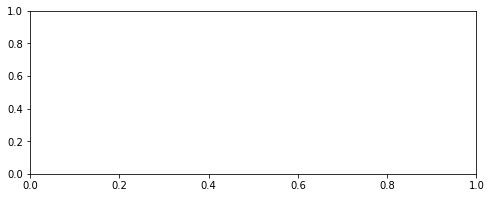

In [115]:
for param_tuple,acc_series in accdf.groupby(paramL): 

  param_str = '-'.join([str(i) for i in param_tuple])
  

# ploi

# import human data - model fits